<a href="https://colab.research.google.com/github/emiliagyr/EstadisticaExperimental/blob/main/P3_Yoga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pingouin
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 35.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import pingouin as pg

pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_spss("Yoga.sav")
df

,ID,Tipotrabajador,sexo,pre_yoga,TR,burn_antes_interve,burn_despues_interve,burn_antes_mindful_recod,burn_despues_mindful_recod
0,21.0,Antiguo,Hombre,No,826.0,46.0,32.0,Alto,Alto
1,61.0,Antiguo,Hombre,Sí,826.0,46.0,32.0,Alto,Alto
2,22.0,Antiguo,Hombre,Sí,768.0,43.0,30.0,Alto,Bajo
3,62.0,Antiguo,Hombre,No,768.0,43.0,30.0,Alto,Bajo
4,24.0,Antiguo,Hombre,Sí,731.0,41.0,29.0,Alto,Bajo
...,...,...,...,...,...,...,...,...,...
75,59.0,Nuevo,Mujer,Sí,486.0,24.0,16.0,Bajo,Bajo
76,18.0,Nuevo,Mujer,No,480.0,24.0,16.0,Bajo,Bajo
77,58.0,Nuevo,Mujer,Sí,480.0,24.0,16.0,Bajo,Bajo
78,20.0,Nuevo,Mujer,No,441.0,22.0,18.0,Bajo,Bajo


In [ ]:
df.describe()

,ID,TR,burn_antes_interve,burn_despues_interve
count,80.0000,80.000000,80.000000,80.000000
mean,40.5000,625.375000,33.400000,23.350000
std,23.2379,105.947847,5.819217,5.178094
min,1.0000,440.000000,22.000000,15.000000
25%,20.7500,523.750000,29.000000,21.000000
50%,40.5000,641.500000,33.500000,23.000000
75%,60.2500,706.250000,37.000000,26.000000
max,80.0000,826.000000,46.000000,50.000000


In [ ]:
df.groupby("pre_yoga").describe()

ID                                                       TR  \
         count       mean        std  min   25%   50%   75%   max count   
pre_yoga                                                                  
No        49.0  40.693878  24.751434  1.0  18.0  43.0  64.0  80.0  49.0   
Sí        31.0  40.193548  21.014946  3.0  24.5  39.0  56.5  79.0  31.0   

                                                                     \
                mean         std    min    25%    50%    75%    max   
pre_yoga                                                              
No        641.102041  102.299651  440.0  580.0  649.0  707.0  826.0   
Sí        600.516129  108.499423  440.0  500.5  625.0  678.0  826.0   

         burn_antes_interve                                               \
                      count       mean       std   min   25%   50%   75%   
pre_yoga                                                                   
No                     49.0  33.979592  5.724544  22.0  30.0  35.0  37.0   
Sí                     31.0  32.483871  5.943461  24.0  28.5  32.0  37.0   

               burn_despues_interve                                         \
           max                count       mean       std   min   25%   50%   
pre_yoga                                                                     
No        46.0                 49.0  23.877551  5.607408  15.0  21.0  24.0   
Sí        46.0                 31.0  22.516129  4.373183  16.0  20.5  21.0   

                      
           75%   max  
pre_yoga              
No        26.0  50.0  
Sí        25.5  32.0

In [ ]:
df.groupby("pre_yoga").skew(numeric_only=True)

,ID,TR,burn_antes_interve,burn_despues_interve
pre_yoga,,,,
No,-0.032927,-0.320955,-0.239745,1.959747
Sí,0.069357,0.272771,0.383416,0.314146


In [ ]:
df.groupby("pre_yoga").apply(pd.DataFrame.kurt, numeric_only=True)

,ID,TR,burn_antes_interve,burn_despues_interve
pre_yoga,,,,
No,-1.356311,-0.530187,-0.504183,8.772718
Sí,-0.881938,-1.068422,-0.551191,-0.580810


<Axes: xlabel='pre_yoga', ylabel='TR'>

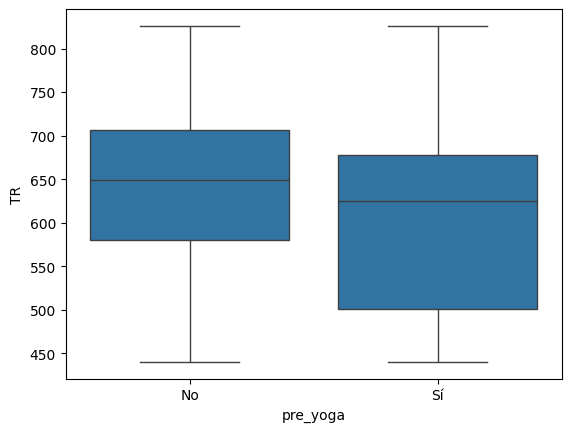

In [ ]:
sns.boxplot(data=df, x="pre_yoga", y="TR")

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

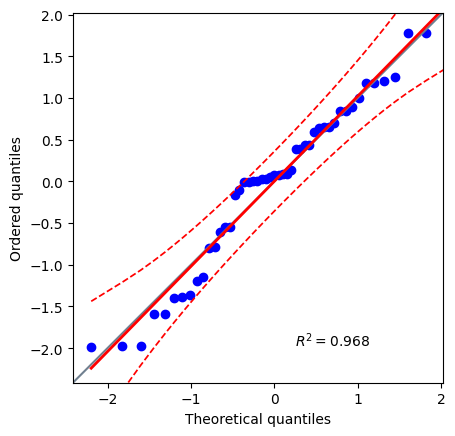

In [ ]:
pg.qqplot(df.query("pre_yoga == 'No'")["TR"])

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

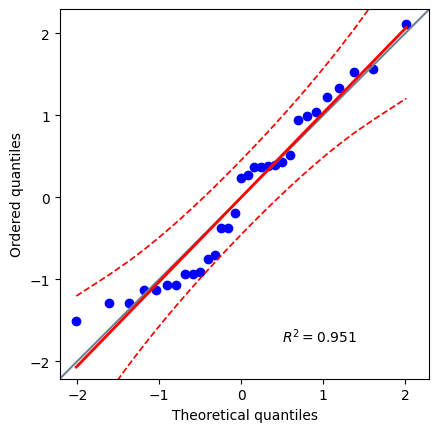

In [ ]:
pg.qqplot(df.query("pre_yoga == 'Sí'")["TR"])

In [ ]:
pg.normality(data=df, dv="TR", group="pre_yoga", method="shapiro")

,W,pval,normal
pre_yoga,,,
No,0.959238,0.088131,True
Sí,0.938909,0.076983,True


In [ ]:
pg.homoscedasticity(data=df, dv="TR", group="pre_yoga")

,W,pval,equal_var
levene,1.051701,0.308286,True


In [ ]:
pg.pairwise_tests(data=df, dv="TR", between="pre_yoga", effsize="cohen", correction=False, alternative="greater")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,pre_yoga,No,Sí,False,True,1.688682,78.0,greater,0.047637,1.614,0.387538
